# Flight Price Prediction

# Problem Definition:

In [7]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
from google.colab import files
uploaded=files.upload()

In [9]:
#Import Train Data
df_train=pd.read_excel("Data_Train.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Analysis

In [10]:
#Check shape of train data
df_train.shape

(10683, 11)

In [11]:
#Check null values in train data
df_train.isnull().sum()
# Feature: "Route" & "Total_stops" have a null values each

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
#Only two null vaues , hence we will drop the null values
df_train.dropna(axis=0,inplace=True)
df_train.shape
#Just one row is deleted.

(10682, 11)

In [13]:
#Check data types 
df_train.info()
#All the independent features are of object data type, only dependent variable "Price" is numeric.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [14]:
from google.colab import files
uploaded=files.upload()

In [15]:
#Import Test Data
df_test=pd.read_excel("Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [16]:
#Check test data shape
df_test.shape

(2671, 10)

In [17]:
#Check null values in test data
df_test.isnull().sum()
#No null values in test data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [18]:
#Combine both the datasets for data anlysis by a reference column
df_train["ref"]= "train"
df_test["ref"]="test"

In [19]:
#Merging both the datasets
df=pd.concat([df_train,df_test],ignore_index=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,ref
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train


In [20]:
#Confirm the shape
df.shape

(13353, 12)

In [21]:
#Check all the independent features
#1. Airline
print(df["Airline"].unique())
print(df["Airline"].nunique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
12


In [22]:
#Replace Jet Airways Business as Jet Airways
df["Airline"]=np.where(df["Airline"]=="Jet Airways Business","Jet Airways",df["Airline"])
#Replace Vistara Premium Economy as Vistara
df["Airline"]=np.where(df["Airline"]=="Vistara Premium economy","Vistara",df["Airline"])
#Replace Multiple carriers Premium economy as Multiple carriers
df["Airline"]=np.where(df["Airline"]=="Multiple carriers Premium economy","Multiple carriers",df["Airline"])
print(df["Airline"].unique())
print(df["Airline"].nunique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Trujet']
9


In [23]:
#2. Date of Journey
print(df["Date_of_Journey"].unique())
print(df["Date_of_Journey"].nunique())

['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
44


In [24]:
# Split the date into day-month & year
df["Day_journey"],df["Month_journey"],df["Year_journey"]=df["Date_of_Journey"].str.split("/",3).str

In [25]:
#Drop columsn "Date_of_journey" & "Year_journey"
df.drop(columns=["Date_of_Journey","Year_journey"],inplace=True)

In [26]:
#3. Source
print(df["Source"].value_counts())
print(df["Source"].nunique())

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64
5


In [27]:
#4. Destination
print(df["Destination"].value_counts())
print(df["Destination"].nunique())

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64
6


In [28]:
#5. Route
print(df["Route"].unique())
print(df["Route"].nunique())

['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU → BOM → GOI → 

In [29]:
#6. Dep_Time
print(df["Dep_Time"].unique())
print(df["Dep_Time"].nunique())

['22:20' '05:50' '09:25' '18:05' '16:50' '09:00' '18:55' '08:00' '08:55'
 '11:25' '09:45' '20:20' '11:40' '21:10' '17:15' '16:40' '08:45' '14:00'
 '20:15' '16:00' '14:10' '22:00' '04:00' '21:25' '21:50' '07:00' '07:05'
 '09:50' '14:35' '10:35' '15:05' '14:15' '06:45' '20:55' '11:10' '05:45'
 '19:00' '23:05' '11:00' '09:35' '21:15' '23:55' '19:45' '08:50' '15:40'
 '06:05' '15:00' '13:55' '05:55' '13:20' '05:05' '06:25' '17:30' '08:20'
 '19:55' '06:30' '14:05' '02:00' '09:40' '08:25' '20:25' '13:15' '02:15'
 '16:55' '20:45' '05:15' '19:50' '20:00' '06:10' '19:30' '04:45' '12:55'
 '18:15' '17:20' '15:25' '23:00' '12:00' '14:45' '11:50' '11:30' '14:40'
 '19:10' '06:00' '23:30' '07:35' '13:05' '12:30' '15:10' '12:50' '18:25'
 '16:30' '00:40' '06:50' '13:00' '19:15' '01:30' '17:00' '10:00' '19:35'
 '15:30' '12:10' '16:10' '20:35' '22:25' '21:05' '05:35' '05:10' '06:40'
 '15:15' '00:30' '08:30' '07:10' '05:30' '14:25' '05:25' '10:20' '17:45'
 '13:10' '22:10' '04:55' '17:50' '21:20' '06:20' '1

In [30]:
# Split the time into Hour & Mins
df["Dep_hour"],df["Dep_min"]=df["Dep_Time"].str.split(":",2).str

In [31]:
df["Dep_hour"].dtype

dtype('O')

In [32]:
#Convert "Dep_hour" from str to int
df["Dep_hour"]=df["Dep_hour"].astype(int)

In [33]:
#New feature extrated wrt "Dep_hour"
df["time_day"]=np.where((df["Dep_hour"]>=0)&(df["Dep_hour"]<6),"Midnight",
                        np.where((df["Dep_hour"]>=6)&(df["Dep_hour"]<12),"Morning",
                                 np.where((df["Dep_hour"]>=12)&(df["Dep_hour"]<18),"Afternoon","Night")))

In [34]:
df["time_day"].value_counts()

Morning      5344
Night        3389
Afternoon    3272
Midnight     1348
Name: time_day, dtype: int64

In [35]:
#Drop columns: Dep_Time,Dep_hour,Dep_min 
df.drop(columns=["Dep_Time","Dep_hour","Dep_min"],inplace=True)

In [36]:
#7 Arrival Time
print(df["Arrival_Time"].unique())
print(df["Arrival_Time"].nunique())

['01:10 22 Mar' '13:15' '04:25 10 Jun' ... '00:20 07 Mar' '00:20 02 Apr'
 '07:45 13 May']
1451


In [37]:
#Convert "Arrival_time" into time format
df["Arrival_Time"],_=df["Arrival_Time"].str.split(" ",1).str

In [38]:
#8. Duration
print(df["Duration"].unique())
print(df["Duration"].nunique())

['2h 50m' '7h 25m' '19h' '5h 25m' '4h 45m' '2h 25m' '15h 30m' '21h 5m'
 '25h 30m' '7h 50m' '13h 15m' '2h 35m' '2h 15m' '12h 10m' '26h 35m'
 '4h 30m' '22h 35m' '23h' '20h 35m' '5h 10m' '15h 20m' '2h 55m' '13h 20m'
 '15h 10m' '5h 45m' '5h 55m' '13h 25m' '22h' '5h 30m' '10h 25m' '5h 15m'
 '2h 30m' '6h 15m' '11h 55m' '11h 5m' '8h 30m' '22h 5m' '2h 45m' '12h'
 '16h 5m' '19h 55m' '3h 15m' '25h 20m' '3h' '16h 15m' '15h 5m' '6h 30m'
 '25h 5m' '12h 25m' '27h 20m' '10h 15m' '10h 30m' '1h 30m' '1h 25m'
 '26h 30m' '7h 20m' '13h 30m' '5h' '19h 5m' '14h 50m' '2h 40m' '22h 10m'
 '9h 35m' '10h' '21h 20m' '18h 45m' '12h 20m' '18h' '9h 15m' '17h 30m'
 '16h 35m' '12h 15m' '7h 30m' '24h' '8h 55m' '7h 10m' '14h 30m' '30h 20m'
 '15h' '12h 45m' '10h 10m' '15h 25m' '14h 5m' '20h 15m' '23h 10m'
 '18h 10m' '16h' '2h 20m' '8h' '16h 55m' '3h 10m' '14h' '23h 50m'
 '21h 40m' '21h 15m' '10h 50m' '8h 15m' '8h 35m' '11h 50m' '27h 35m'
 '8h 25m' '20h 55m' '4h 50m' '8h 10m' '24h 25m' '23h 35m' '25h 45m'
 '26h 10m' '28h 

In [39]:
#Split "Duration" in to "Duration_hr" & "Duration_min"
df["Duration_hr"],df["Duration_min"]=df["Duration"].str.split(" ",2).str

In [40]:
#Check new columns
print(df["Duration_hr"].unique())
print(df["Duration_hr"].nunique())

['2h' '7h' '19h' '5h' '4h' '15h' '21h' '25h' '13h' '12h' '26h' '22h' '23h'
 '20h' '10h' '6h' '11h' '8h' '16h' '3h' '27h' '1h' '14h' '9h' '18h' '17h'
 '24h' '30h' '28h' '29h' '37h' '34h' '38h' '35h' '36h' '47h' '33h' '32h'
 '31h' '42h' '39h' '5m' '41h' '40h']
44


In [41]:
#Remove 'h' & 'm' from "Duration_hr"
df["Duration_hr"]=df["Duration_hr"].str.replace("h","").str.replace("m","")
print(df["Duration_hr"].unique())

['2' '7' '19' '5' '4' '15' '21' '25' '13' '12' '26' '22' '23' '20' '10'
 '6' '11' '8' '16' '3' '27' '1' '14' '9' '18' '17' '24' '30' '28' '29'
 '37' '34' '38' '35' '36' '47' '33' '32' '31' '42' '39' '41' '40']


In [42]:
#Check column
print(df["Duration_min"].unique())
print(df["Duration_min"].nunique())

['50m' '25m' nan '45m' '30m' '5m' '15m' '35m' '10m' '20m' '55m' '40m']
11


In [43]:
#Remove 'm' from "Duration_min"
df["Duration_min"]=df["Duration_min"].str.replace("m","")
print(df["Duration_min"].unique())

['50' '25' nan '45' '30' '5' '15' '35' '10' '20' '55' '40']


In [44]:
#Check null values in "Duration_min"
df["Duration_min"].isnull().sum()

1286

In [45]:
#Fill null values by 0
df["Duration_min"].fillna("0",axis=0,inplace=True)
df["Duration_min"].isnull().sum()

0

In [46]:
#Convert "Duration_mins" in terms of decimal by dividing each element by 60mins
df["Duration_min"]=df["Duration_min"].astype(float)
for i in range(df["Duration_min"].count()):
    df["Duration_min"].iloc[i]=(df["Duration_min"].iloc[i]/60)  

In [47]:
df["Duration_hr"]=df["Duration_hr"].astype(float)

In [48]:
#New feature "travel duration" can be created by adding "Duration_hr" & "Duration_min"
df["travel_duration"]=df["Duration_hr"]+df["Duration_min"]

In [49]:
df["travel_duration"].isnull().sum()

0

In [50]:
#As we have extracted the travel duration in numeric form, we can drop "Duration_hr","Duration_min","Duration"
df.drop(columns=["Duration_hr","Duration_min","Duration"],inplace=True)

In [51]:
#Check correlation between price & travel duration
df.corr()

,Price,travel_duration
Price,1.000000,0.506604
travel_duration,0.506604,1.000000


In [52]:
#9 Total_stops
print(df["Total_Stops"].unique())
print(df["Total_Stops"].nunique())

['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
5


In [53]:
#Split column
df["Total_Stops"],df["dummy"]=df["Total_Stops"].str.split(" ",2).str

In [54]:
#Drop dummy column
df.drop(columns=['dummy'],inplace=True)

In [55]:
#Check unique value in column
print(df["Total_Stops"].unique())

['non-stop' '2' '1' '3' '4']


In [56]:
#Check values in column
df["Total_Stops"].value_counts()

1           7056
non-stop    4340
2           1899
3             56
4              2
Name: Total_Stops, dtype: int64

In [57]:
# Replace non-stop as 0.
for i in range(df["Total_Stops"].count()):
    if df["Total_Stops"].iloc[i] == 'non-stop':
        df["Total_Stops"].iloc[i]="0"
df["Total_Stops"].value_counts()      

1    7056
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

In [58]:
#Convert value from str to int
df["Total_Stops"]=df["Total_Stops"].astype(int)

In [59]:
df["Total_Stops"].value_counts()

1    7056
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

In [60]:
df.corr()
#Price has good correlation with total_stops & travlel_duration
#total_stops & travlel_duration are well correlated among eachother

,Total_Stops,Price,travel_duration
Total_Stops,1.000000,0.603897,0.737136
Price,0.603897,1.000000,0.506604
travel_duration,0.737136,0.506604,1.000000


In [61]:
#10. Additional_Info
print(df["Additional_Info"].unique())
print(df["Additional_Info"].nunique())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
10


In [62]:
#There are two identical values "No info" & "No Info"
df["Additional_Info"].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [63]:
df["Additional_Info"]=df["Additional_Info"].str.replace("No Info","No info")
df["Additional_Info"].value_counts()

No info                         10495
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [64]:
print(df["Additional_Info"].unique())
print(df["Additional_Info"].nunique())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' '1 Long layover' 'Change airports' 'Business class'
 'Red-eye flight' '2 Long layover']
9


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13353 entries, 0 to 13352
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Arrival_Time     13353 non-null  object 
 5   Total_Stops      13353 non-null  int64  
 6   Additional_Info  13353 non-null  object 
 7   Price            10682 non-null  float64
 8   ref              13353 non-null  object 
 9   Day_journey      13353 non-null  object 
 10  Month_journey    13353 non-null  object 
 11  time_day         13353 non-null  object 
 12  travel_duration  13353 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.3+ MB


In [66]:
# Check the data
df.head(2)
#Column "Route" has 132 unique values and difficult to handle with one hot encoder.
#"Route" has number of stops which is taken care in number of stops.
#"Day_journey" & "Arrival Time" is not of prime importance as month is used for predicting
df.drop(columns=["Day_journey","Route","Arrival_Time"],inplace=True)

# EDA

<AxesSubplot:>

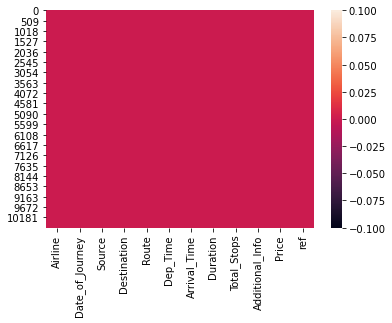

In [ ]:
#Using the train  data.
#Univariate Analysis
#Check null values
sns.heatmap(df_train.isnull())
#No null values found

<AxesSubplot:ylabel='Frequency'>

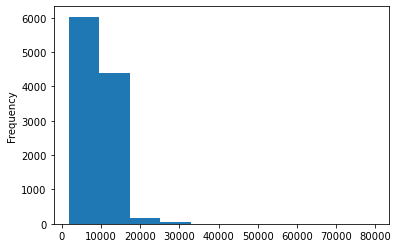

In [ ]:
#Check the data distribution of target variables
df_train["Price"].plot.hist()
#The data is skewed

<AxesSubplot:xlabel='Price'>

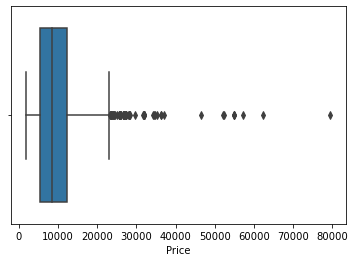

In [ ]:
#Check box plot for target variable "price"
sns.boxplot(x="Price",data=df_train)
#The outliers cannot be treated as abnormalities as the prices depend on many parameters. Hence it will vary. 

<AxesSubplot:xlabel='Airline', ylabel='count'>

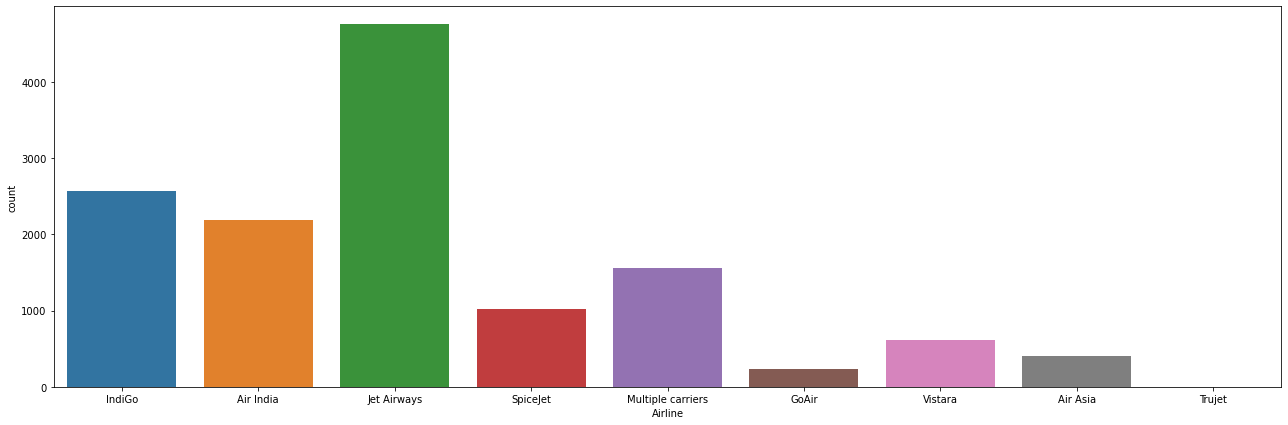

In [ ]:
#Check most preferred Airlines
plt.figure(figsize=(22,7))
sns.countplot(x="Airline",data=df)

<AxesSubplot:xlabel='Month_journey', ylabel='count'>

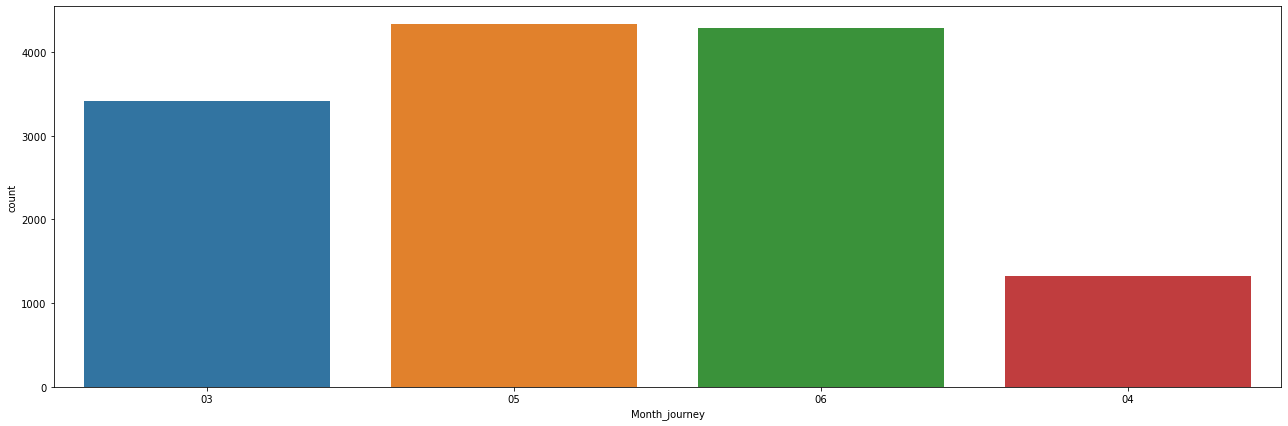

In [ ]:
#Check most preferred month of journey
plt.figure(figsize=(22,7))
sns.countplot(x="Month_journey",data=df)

<AxesSubplot:xlabel='Source', ylabel='count'>

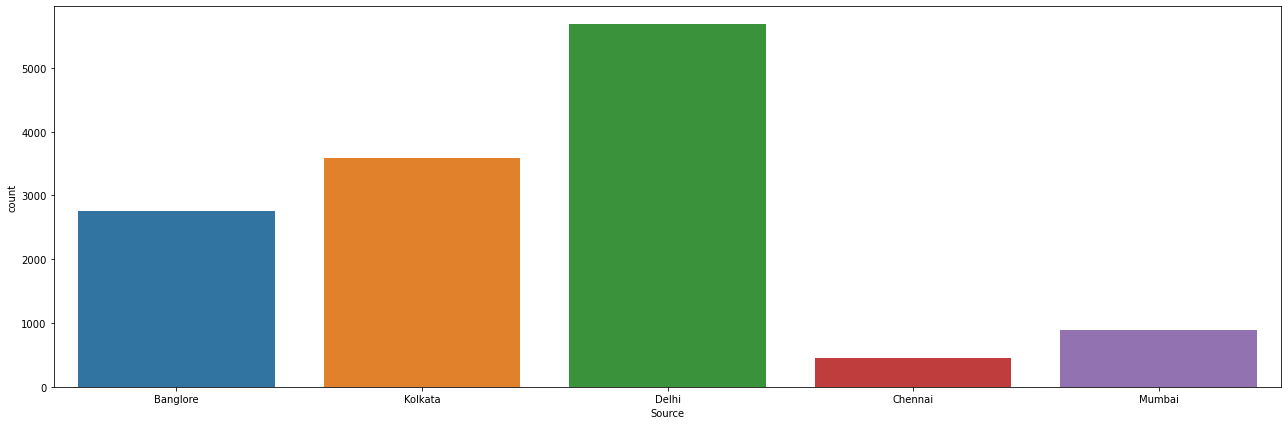

In [ ]:
#Check from where the most numnber of flights take-off
plt.figure(figsize=(22,7))
sns.countplot(x="Source",data=df)

<AxesSubplot:xlabel='time_day', ylabel='count'>

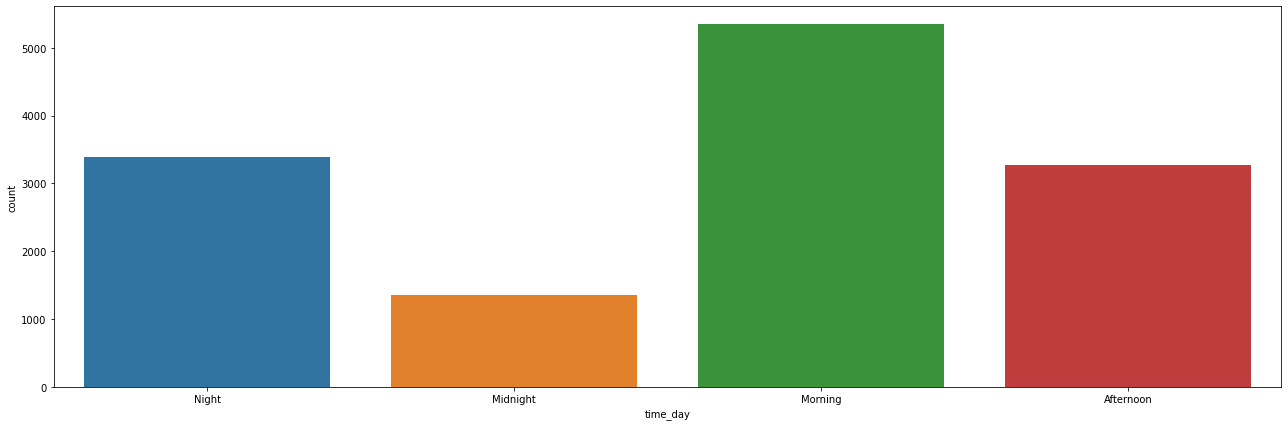

In [ ]:
#Check the the preferred time of day for take=offs
plt.figure(figsize=(22,7))
sns.countplot(x="time_day",data=df)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

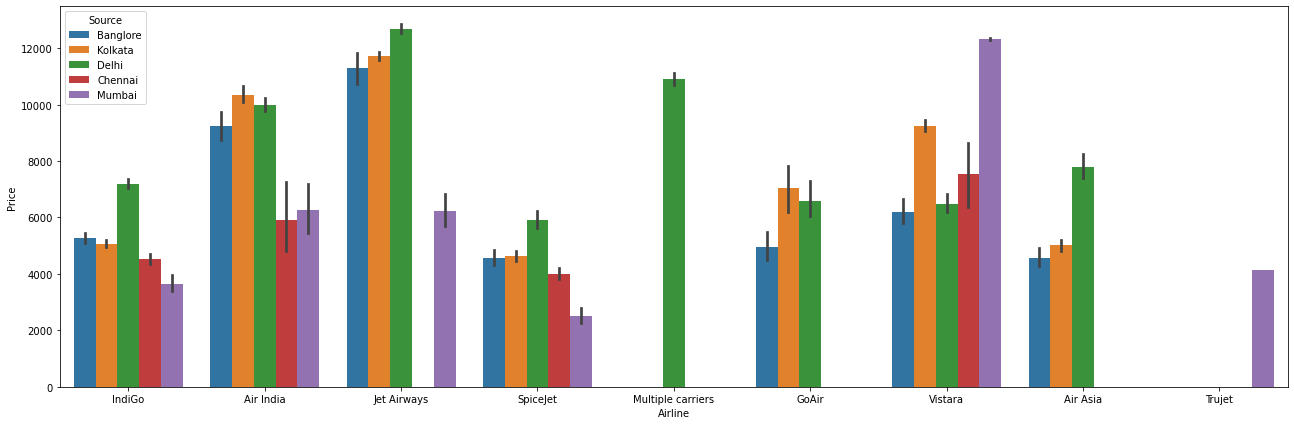

In [ ]:
#Bi-variate Analysis
plt.figure(figsize=(22,7))
sns.barplot(x="Airline",y="Price",data=df,hue="Source")

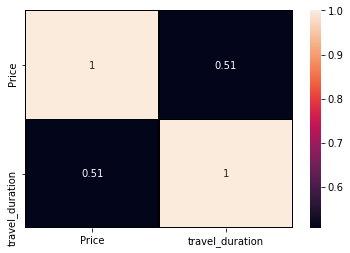

In [ ]:
#Correlation between price & travel duration
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="Black")
plt.show()

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

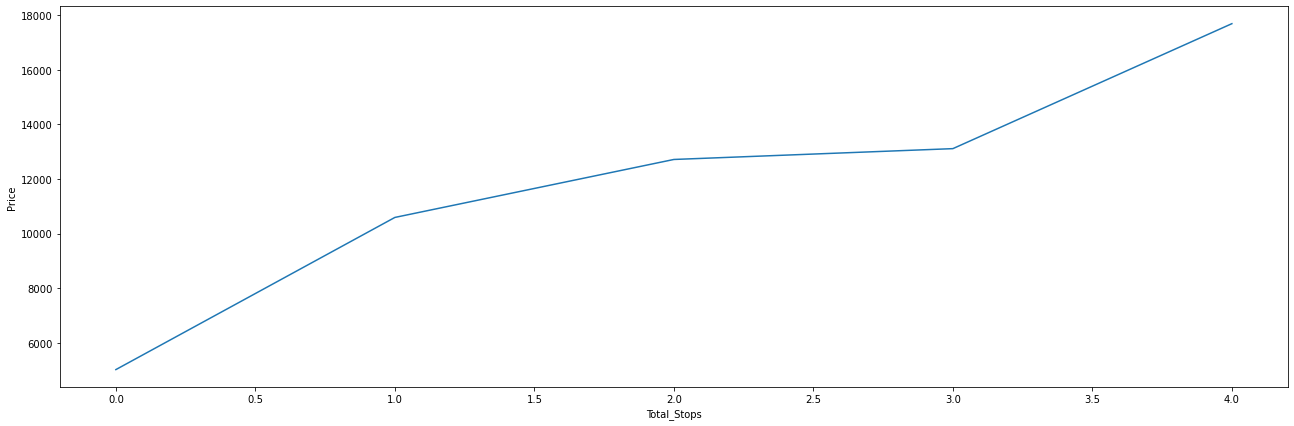

In [ ]:
#Check price vs no of stops
plt.figure(figsize=(22,7))
sns.lineplot(x="Total_Stops",y="Price",data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='travel_duration'>

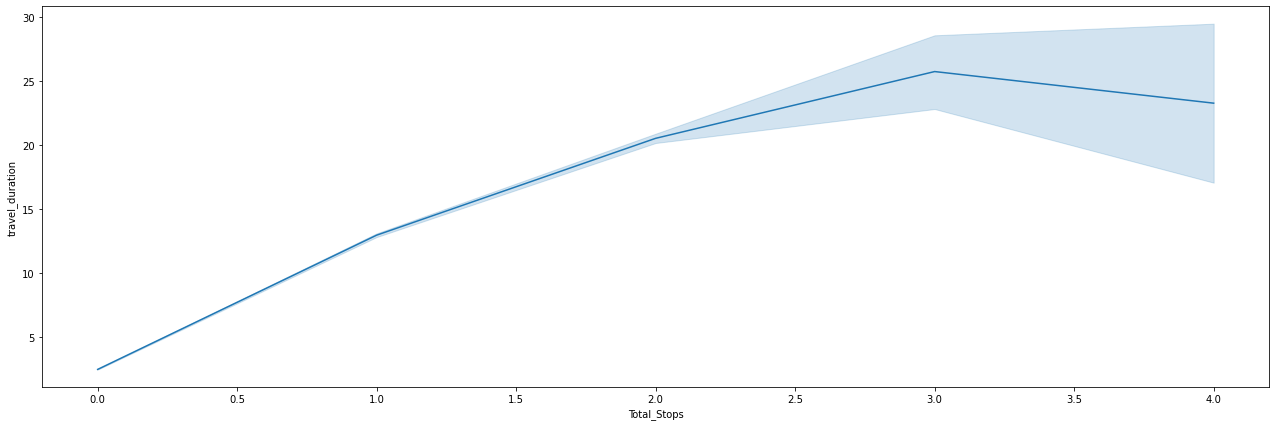

In [ ]:
#Relation between independent variables
plt.figure(figsize=(22,7))
sns.lineplot(x="Total_Stops",y="travel_duration",data=df)

In [ ]:
df.shape

(13353, 13)

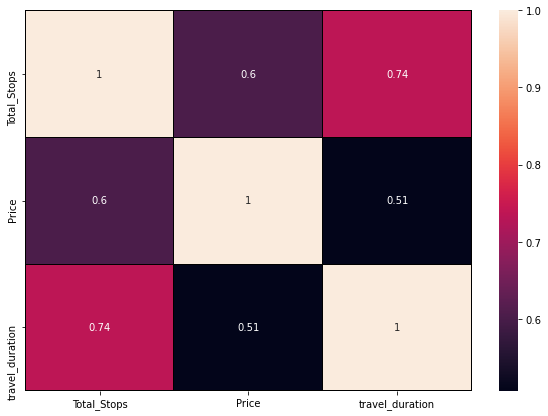

In [ ]:
#Multi variate analysis
#Correlation between price & travel duration
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="Black")
plt.show()

# Pre-processing Pipeline

In [67]:
#Check data
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,ref,Month_journey,time_day,travel_duration
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,train,03,Night,2.833333
1,Air India,Kolkata,Banglore,2,No info,7662.0,train,05,Midnight,7.416667
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,train,06,Morning,19.000000
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,train,05,Night,5.416667
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,train,03,Afternoon,4.750000


In [68]:
#Check shape
print(df.shape)
df.info()

(13353, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13353 entries, 0 to 13352
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Total_Stops      13353 non-null  int64  
 4   Additional_Info  13353 non-null  object 
 5   Price            10682 non-null  float64
 6   ref              13353 non-null  object 
 7   Month_journey    13353 non-null  object 
 8   time_day         13353 non-null  object 
 9   travel_duration  13353 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


In [69]:
#Using get dummies convert data to numeric
df_final=pd.get_dummies(df,columns=["Airline","Source","Destination","Additional_Info","Month_journey","time_day"],drop_first=True)
df_final.shape

(13353, 35)

In [70]:
#Test data set
df_test_final=df_final[df_final["ref"]=="test"]
df_test_final.head()

,Total_Stops,Price,ref,travel_duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Month_journey_04,Month_journey_05,Month_journey_06,time_day_Midnight,time_day_Morning,time_day_Night
10682,1,NaN,test,10.916667,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
10683,1,NaN,test,4.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
10684,1,NaN,test,23.750000,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
10685,1,NaN,test,13.000000,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
10686,0,NaN,test,2.833333,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [71]:
#Check Test data set
print("(row,columns)=",df_test_final.shape)
df_test_final.isnull().sum()

(row,columns)= (2671, 35)


Total_Stops                                        0
Price                                           2671
ref                                                0
travel_duration                                    0
Airline_Air India                                  0
Airline_GoAir                                      0
Airline_IndiGo                                     0
Airline_Jet Airways                                0
Airline_Multiple carriers                          0
Airline_SpiceJet                                   0
Airline_Trujet                                     0
Airline_Vistara                                    0
Source_Chennai                                     0
Source_Delhi                                       0
Source_Kolkata                                     0
Source_Mumbai                                      0
Destination_Cochin                                 0
Destination_Delhi                                  0
Destination_Hyderabad                         

In [72]:
#Drop price columns from test dataset
df_test_final.drop(columns=["Price","ref"],inplace=True)
df_test_final.shape

(2671, 33)

In [73]:
#Train data
df_train_final=df_final[df_final["ref"]=="train"]
df_train_final.head()

,Total_Stops,Price,ref,travel_duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Month_journey_04,Month_journey_05,Month_journey_06,time_day_Midnight,time_day_Morning,time_day_Night
0,0,3897.0,train,2.833333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,7662.0,train,7.416667,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,2,13882.0,train,19.000000,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,1,6218.0,train,5.416667,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,1,13302.0,train,4.750000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [74]:
#Check df_train_final
print("(row,columns)=",df_train_final.shape)
df_train_final.isnull().sum()

(row,columns)= (10682, 35)


Total_Stops                                     0
Price                                           0
ref                                             0
travel_duration                                 0
Airline_Air India                               0
Airline_GoAir                                   0
Airline_IndiGo                                  0
Airline_Jet Airways                             0
Airline_Multiple carriers                       0
Airline_SpiceJet                                0
Airline_Trujet                                  0
Airline_Vistara                                 0
Source_Chennai                                  0
Source_Delhi                                    0
Source_Kolkata                                  0
Source_Mumbai                                   0
Destination_Cochin                              0
Destination_Delhi                               0
Destination_Hyderabad                           0
Destination_Kolkata                             0


In [75]:
#Drop "ref" coulmns
df_train_final.drop(columns=["ref"],inplace=True)
df_train_final.shape

(10682, 34)

In [76]:
#Lets split training data into dependent & independent variables
df_x=df_train_final.drop(columns=["Price"])
y=df_train_final["Price"] #Independent variables
print(df_x.shape,y.shape) # Dependent variables

(10682, 33) (10682,)


In [77]:
#Data scaling to achieve more accuracy
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Total_Stops,travel_duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Month_journey_04,Month_journey_05,Month_journey_06,time_day_Midnight,time_day_Morning,time_day_Night
0,-1.220666,-0.931601,-0.442785,-0.136005,2.050151,-0.751445,-0.357248,-0.287972,-0.009676,-0.217382,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.175733,0.528906,-0.009676,-0.335203,-0.692904,-0.685369,-0.337788,-0.817962,1.718537
1,1.741432,-0.390028,2.258432,-0.136005,-0.487769,-0.751445,-0.357248,-0.287972,-0.009676,-0.217382,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.175733,0.528906,-0.009676,-0.335203,1.443201,-0.685369,2.960434,-0.817962,-0.581890
2,1.741432,0.978676,-0.442785,-0.136005,-0.487769,1.330769,-0.357248,-0.287972,-0.009676,-0.217382,-0.192319,1.164018,-0.606266,-0.264206,1.164018,-0.366513,-0.264206,-0.192319,-0.309176,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.175733,0.528906,-0.009676,-0.335203,-0.692904,1.459069,-0.337788,1.222550,-0.581890
3,0.260383,-0.626351,-0.442785,-0.136005,2.050151,-0.751445,-0.357248,-0.287972,-0.009676,-0.217382,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.175733,0.528906,-0.009676,-0.335203,1.443201,-0.685369,-0.337788,-0.817962,1.718537
4,0.260383,-0.705125,-0.442785,-0.136005,2.050151,-0.751445,-0.357248,-0.287972,-0.009676,-0.217382,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.175733,0.528906,-0.009676,-0.335203,-0.692904,-0.685369,-0.337788,-0.817962,-0.581890


In [78]:
#Considering n_components
from sklearn.decomposition import PCA
pca=PCA(n_components=30)
pc_x=pca.fit_transform(x)

#Information retained in data after dimensionality reduction
print("Percentage info retained in data=",(sum(pca.explained_variance_ratio_)*100))

Percentage info retained in data= 99.99999999999999


# Building Machine Learning Models

In [79]:
#Check best random state: Considering r2 metrics
#User-defined function to find r2 score:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [80]:
#User defined function for cross-validation
from sklearn.model_selection import cross_val_score
def cross_val(model,x,y):
    cv=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",cv.mean())
    print(cv)

In [81]:
#As datapoints are huge in number, we will check model for best "r2- score" then proceed with hyper-parameter tuning.

# 1. Decision Tree Regression

In [84]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dt_r2=maxr2_score(dtr,pc_x,y)

max r2 score corresponding to  75  is  0.7307276887055678


In [85]:
#Cross validation (Decision tree)
cross_val(dtr,pc_x,y)

Mean r2 score for regressor:  0.6495712169717708
[0.65064417 0.63546176 0.65711433 0.61770705 0.68692878]


# 2. K-Nearest Neighbor Regressor

In [86]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
r_state=maxr2_score(knr,pc_x,y)

max r2 score corresponding to  98  is  0.7643862665654877


In [87]:
#Cross validation (KNN Classifier)
cross_val(knr,pc_x,y)

Mean r2 score for regressor:  0.7317701629043782
[0.72845965 0.75428919 0.7298101  0.7219862  0.72430568]


# 3. Support Vector Regressor

In [88]:
from sklearn.svm import SVR
svr=SVR()
svr_r2=maxr2_score(svr,pc_x,y)

max r2 score corresponding to  64  is  0.08270371862471748


In [89]:
#Cross validation (SVR)
cross_val(svr,pc_x,y)

Mean r2 score for regressor:  0.05833071850657736
[0.05435583 0.0426462  0.06507786 0.07585491 0.0537188 ]


# 4. Random Forest Regressor

In [90]:
#Check maxr2_score function
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr_r2=maxr2_score(rfr,pc_x,y)

max r2 score corresponding to  81  is  0.7678926079900379


In [91]:
#Cross validation (Random Forest)
cross_val(rfr,pc_x,y)

Mean r2 score for regressor:  0.7249212924487041
[0.70547105 0.7288491  0.7190134  0.72126606 0.75000686]


# 5. Ada-Boost Regressor

In [92]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()
r_state=maxr2_score(adr,pc_x,y)

max r2 score corresponding to  75  is  0.5834932166116553


In [93]:
#Cross validation (Adaboost Regressor)
cross_val(adr,pc_x,y)

Mean r2 score for regressor:  0.4514272207916214
[0.4801641  0.42514035 0.40611249 0.39933072 0.54638844]


# 6. Linear Regression

In [94]:
#Linear Regressor
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,pc_x,y)

max r2 score corresponding to  75  is  0.7211372788790399


In [95]:
#Cross validation (Linear Regressor)
cross_val(lr,pc_x,y)

Mean r2 score for regressor:  -1.1260919275284046e+19
[ 6.31613986e-01 -1.75268860e+19  6.68841911e-01 -3.76168643e+19
 -1.16084609e+18]


In [102]:
# Random forest & KNNR are the best performing model

In [98]:
#Hyper parameter tuning
#Lets use KNN regressor but we will find the optimal value of n_neigbors using grid search
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
rgr = GridSearchCV(knr, parameters, cv=10)
rgr.fit(pc_x, y)
rgr.best_params_

{'n_neighbors': 5}

In [99]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
r_state=maxr2_score(knr,pc_x,y)

max r2 score corresponding to  98  is  0.7643862665654877


In [101]:
#KNNR with hyper parameters
# Random state= 98
# Parameter={'n_neighbors': 5}
x_train,x_test,y_train,y_test=train_test_split(pc_x,y,test_size=0.2,random_state=98)
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("R2 score=",r2_score(y_test,y_pred))
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean abs error=",mean_absolute_error(y_test,y_pred))

R2 score= 0.7643862665654877
RMSE= 2076.27144931712
Mean abs error= 1153.1884885353297


In [103]:
#Hyper Parameter tuning (random forest regressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
rgr = GridSearchCV(rfr, parameters, cv=5)
rgr.fit(pc_x, y)
rgr.best_params_

{'n_estimators': 500}

In [104]:
#Random Forest with hyper parameters
# Random state= 81
# Parameter={'n_estimators': 500}

x_train,x_test,y_train,y_test=train_test_split(pc_x,y,test_size=0.2,random_state=81)
rfr=RandomForestRegressor(n_estimators=500)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("R2 score=",r2_score(y_test,y_pred))
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean abs error=",mean_absolute_error(y_test,y_pred))

R2 score= 0.7651406576986968
RMSE= 2153.460303395442
Mean abs error= 1066.6920228571516


In [ ]:
#K-Nearest Neighbor Regressor has relatively high R2 score & less RMSE. 
#Therefore KNNR is best performing model.

In [105]:
#Predict the values for test dataset
#Transform test dataset as per PCA
pca=PCA(n_components=30)
pc_x_test=pca.fit_transform(df_test_final)

In [106]:
#Predict price for test dataset using KNNR
pred_price=knr.predict(pc_x_test)


In [107]:
#Save into dataframe
pred_price=pd.DataFrame(pred_price,columns=["Price"])

In [109]:
#Save in CSV format
pred_price.to_csv("Flight_Prices_Prediction.csv",index=False)

In [111]:
from google.colab import files
pred_price.to_csv('Flight_Prices_Prediction.csv')         
files.download('Flight_Prices_Prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>